In [1]:
#FIRST OF ALL WE WILL DO EDA ON TITANIC 


In [5]:
# EXPLORATORY DATA ANALYSIS
# 1 ANALYSIS - UNIVARITE ANALYSIS.MULTIVARIATE ANALYSIS
# 2 FEATURE ENGINEERING - CREATING NEW COLUMNS
# 3 HANDLING OUTLIER - 


In [3]:
#Import Necessary Liabraries for predection

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\scipy\__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.26.4
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [6]:
df = pd.read_csv("titanic.csv")

In [7]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [8]:
# check the shape 
df.shape

(418, 12)

In [9]:
df.tail()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
413,1305,0,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
416,1308,0,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [10]:
df.tail(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
417,1309,0,3,"Peter, Master. Michael J",male,NaN,1,1,2668,22.3583,NaN,C


In [11]:
# understanding data using info 
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [12]:
# next step is check for an null values
# todo that we will use
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
# we can see that we have null values for age and cabin coulmn
# but we can see that more cabin has only around 85 data in that column
# so we will remove them because it is not going to contribute any information
df=df.drop(columns="Cabin", axis=1)

In [14]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
154,1046,0,3,"Asplund, Master. Filip Oscar",male,13.0,4,2,347077,31.3875,S
43,935,1,2,"Corbett, Mrs. Walter H (Irene Colvin)",female,30.0,0,0,237249,13.0000,S
188,1080,1,3,"Sage, Miss. Ada",female,NaN,8,2,CA. 2343,69.5500,S
184,1076,1,1,"Douglas, Mrs. Frederick Charles (Mary Helene B...",female,27.0,1,1,PC 17558,247.5208,C
362,1254,1,2,"Ware, Mrs. John James (Florence Louise Long)",female,31.0,0,0,CA 31352,21.0000,S


In [15]:
# In above dataframe you can see their is no Cabin column


In [16]:
# let us an mathematical information on this dataset
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [17]:
# we can remove the rows that has age columns as  null values
# or we can reply null values with some another values using mean

In [18]:
# first we will do by fill the mean values to the null values
df["Age"].fillna(df['Age'].mean(),inplace= True)

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [20]:
# checking whether we have null values or not in our dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           1
Embarked       0
dtype: int64

In [22]:
df["Fare"].fillna(df['Fare'].mean(),inplace= True)


In [23]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.50000,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.00000,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.00000,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.00000,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.00000,1,1,3101298,12.2875,S
...,...,...,...,...,...,...,...,...,...,...,...
413,1305,0,3,"Spector, Mr. Woolf",male,30.27259,0,0,A.5. 3236,8.0500,S
414,1306,1,1,"Oliva y Ocana, Dona. Fermina",female,39.00000,0,0,PC 17758,108.9000,C
415,1307,0,3,"Saether, Mr. Simon Sivertsen",male,38.50000,0,0,SOTON/O.Q. 3101262,7.2500,S
416,1308,0,3,"Ware, Mr. Frederick",male,30.27259,0,0,359309,8.0500,S


In [24]:
# checking whether we have null values or not in our dataset
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [25]:
# so we can observe that we are not having any missing values

# EDA

In [26]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,12.634534,0.896760,0.981429,55.840500
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,23.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,30.272590,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,35.750000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


In [27]:
df["Survived"].value_counts()

0    266
1    152
Name: Survived, dtype: int64

In [28]:
#checking for survived & non survived cases with countplot

In [29]:
sns.set()

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Survived', ylabel='count'>

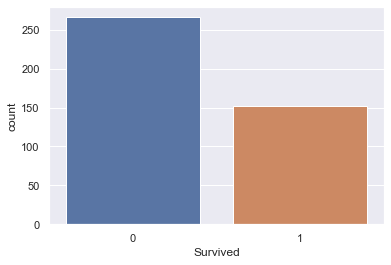

In [30]:
sns.countplot('Survived', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

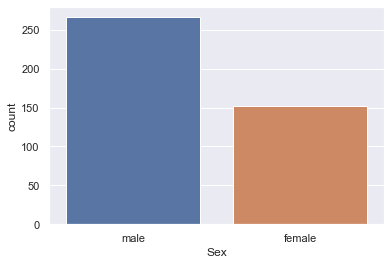

In [31]:
sns.countplot('Sex', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Sex', ylabel='count'>

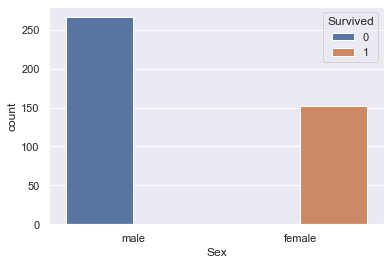

In [32]:
sns.countplot('Sex', hue="Survived", data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Pclass', ylabel='count'>

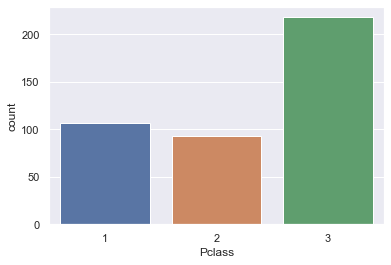

In [33]:

# cheking countplot for "Pclass" column
sns.countplot('Pclass', data=df)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Embarked', ylabel='count'>

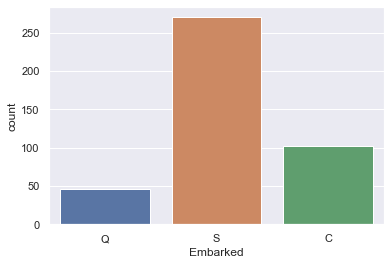

In [34]:
sns.countplot('Embarked', data=df)

In [35]:
# we can most of the people have started their journey from Southampton (S).

# Checking numerical attributes

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Age', ylabel='Density'>

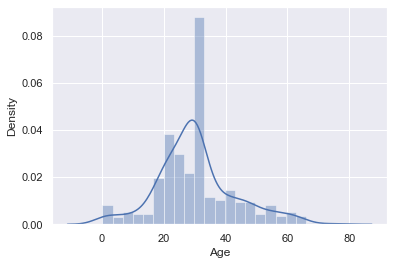

In [36]:
#checking for Age column
sns.distplot(df['Age'])

In [37]:
# form this graph we can understand that 30 old people have travelling more

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='Fare', ylabel='Density'>

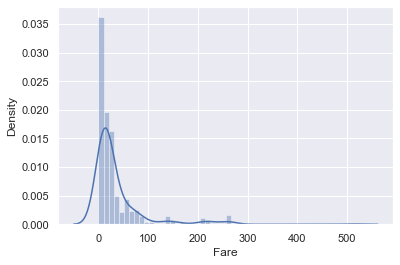

In [80]:
#checking for Fare column
sns.distplot(df['Fare'])

In [39]:
# here in above graph you can see the price is b/w 0 - 100 max fare:-the price paid by a passenger for their ticket

# HeatMap to check correlation

<AxesSubplot:>

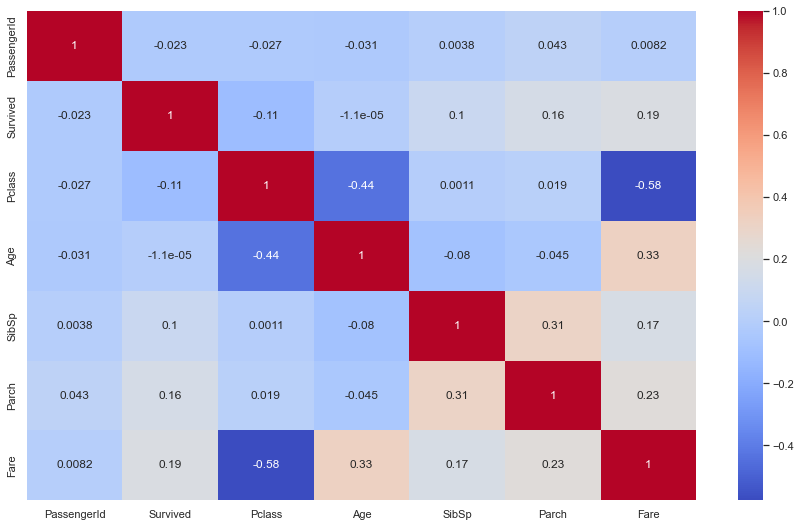

In [40]:
corr = df.corr()
plt.figure(figsize=(15, 9))
sns.heatmap(corr, annot=True, cmap='coolwarm')

In [41]:
df.sample(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
44,936,1,1,"Kimball, Mrs. Edwin Nelson Jr (Gertrude Parsons)",female,45.00000,1,0,11753,52.5542,S
349,1241,1,2,"Walcroft, Miss. Nellie",female,31.00000,0,0,F.C.C. 13528,21.0000,S
24,916,1,1,"Ryerson, Mrs. Arthur Larned (Emily Maria Borie)",female,48.00000,1,3,PC 17608,262.3750,C
29,921,0,3,"Samaan, Mr. Elias",male,30.27259,2,0,2662,21.6792,C
26,918,1,1,"Ostby, Miss. Helene Ragnhild",female,22.00000,0,1,113509,61.9792,C


## feature selection 

In [42]:
# In the above dataset we can observe that the name and ticket columns will not help in making prediction so we will remove that columns
df=df.drop(columns=['Name', 'Ticket'], axis=1)
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
316,1208,0,1,male,57.00000,1,0,146.5208,C
151,1043,0,3,male,30.27259,0,0,7.8958,C
295,1187,0,3,male,26.00000,0,0,7.8958,S
89,981,0,2,male,2.00000,1,1,23.0000,S
200,1092,1,3,female,30.27259,0,0,15.5000,Q


# LABEL ENCODING

In [43]:
# we know that system only know binary numbers so we will convert
#Categorical data colums into Numerical for further modelling
# we can see in our entire data set we have only 2 columns that have the categorical data

In [44]:
df["Sex"].value_counts()

male      266
female    152
Name: Sex, dtype: int64

In [45]:

df['Embarked'].value_counts()

S    270
C    102
Q     46
Name: Embarked, dtype: int64

In [46]:
from sklearn.preprocessing import LabelEncoder
cols = ['Sex', 'Embarked']
le = LabelEncoder()

for col in cols:
    df[col] = le.fit_transform(df[col])
df.sample(5)

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
26,918,1,1,0,22.00000,0,1,61.9792,0
282,1174,1,3,0,30.27259,0,0,7.7500,1
34,926,0,1,1,30.00000,1,0,57.7500,0
347,1239,1,3,0,38.00000,0,0,7.2292,0
278,1170,0,2,1,30.00000,1,0,21.0000,2


In [47]:
# we can observe above that has all numerical columns

# Extracting input and output colums(target col)

In [48]:
X = df.drop(columns = ['PassengerId','Survived'],axis=1) # independent variable
Y = df['Survived']# dependent variable


In [49]:
X

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.50000,0,0,7.8292,1
1,3,0,47.00000,1,0,7.0000,2
2,2,1,62.00000,0,0,9.6875,1
3,3,1,27.00000,0,0,8.6625,2
4,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...
413,3,1,30.27259,0,0,8.0500,2
414,1,0,39.00000,0,0,108.9000,0
415,3,1,38.50000,0,0,7.2500,2
416,3,1,30.27259,0,0,8.0500,2


In [50]:
# when we print the x when we got only input variable and target variable surived is missing
# that survived colum is in y  variable
Y

0      0
1      1
2      0
3      0
4      1
      ..
413    0
414    1
415    0
416    0
417    0
Name: Survived, Length: 418, dtype: int64

# Splitting the data into training data & Test data.

In [51]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y, test_size=0.2, random_state=2)

In [52]:
X_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
280,3,0,23.00000,0,0,8.6625,2
284,3,0,2.00000,1,1,20.2125,2
40,3,1,39.00000,0,1,13.4167,0
17,3,1,21.00000,0,0,7.2250,0
362,2,0,31.00000,0,0,21.0000,2
...,...,...,...,...,...,...,...
299,3,1,29.00000,0,0,7.8542,2
22,1,0,30.27259,0,0,31.6833,2
72,3,0,29.00000,0,0,7.9250,2
15,2,0,24.00000,1,0,27.7208,0


In [53]:
X_test

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
146,1,1,30.27259,0,0,51.8625,2
223,3,1,21.00000,0,0,7.7958,2
193,2,1,61.00000,0,0,12.3500,1
305,1,0,64.00000,1,1,26.5500,2
188,3,0,30.27259,8,2,69.5500,2
...,...,...,...,...,...,...,...
348,2,1,24.00000,0,0,13.5000,2
30,2,1,50.00000,1,0,26.0000,2
174,3,1,40.00000,1,5,31.3875,2
68,1,1,31.00000,0,0,28.5375,0


In [54]:
# we can see that our data was splitted into train and test let check its shape

In [55]:
X.shape# actual dataset number of rows and columns

(418, 7)

In [56]:
X_train.shape

(334, 7)

In [57]:
X_test.shape

(84, 7)

# EVALUATING THE MODEL / MODEL SELECTION 

In [58]:
# importing the logistic regression from sklearn.linear_model and imported accuray_score from metrics
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

In [59]:
# creating an object for the LogisticRegression class

model = LogisticRegression()

In [60]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Sex          418 non-null    int32  
 4   Age          418 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Fare         418 non-null    float64
 8   Embarked     418 non-null    int32  
dtypes: float64(2), int32(2), int64(5)
memory usage: 26.2 KB


In [61]:
import ast # inorder to work with strings

In [62]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [63]:
df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,1,34.50000,0,0,7.8292,1
1,893,1,3,0,47.00000,1,0,7.0000,2
2,894,0,2,1,62.00000,0,0,9.6875,1
3,895,0,3,1,27.00000,0,0,8.6625,2
4,896,1,3,0,22.00000,1,1,12.2875,2
...,...,...,...,...,...,...,...,...,...
413,1305,0,3,1,30.27259,0,0,8.0500,2
414,1306,1,1,0,39.00000,0,0,108.9000,0
415,1307,0,3,1,38.50000,0,0,7.2500,2
416,1308,0,3,1,30.27259,0,0,8.0500,2


In [64]:
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Sex            0
Age            0
SibSp          0
Parch          0
Fare           0
Embarked       0
dtype: int64

In [65]:

df.astype({'Age': np.int16, 'Fare': np.int16}).dtypes


PassengerId    int64
Survived       int64
Pclass         int64
Sex            int32
Age            int16
SibSp          int64
Parch          int64
Fare           int16
Embarked       int32
dtype: object

In [66]:
#training the Logistic Regression model with training data
model.fit(X_train, Y_train)

C:\Users\PAVAN SAI KUMAR\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [67]:
#accuracy on training data
X_train_prediction = model.predict(X_train)

In [68]:
print(X_train_prediction)

[1 1 0 0 1 1 0 0 0 1 0 0 1 0 0 0 1 0 1 0 1 0 1 1 0 0 0 0 0 1 0 0 0 0 0 0 0
 1 1 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 1 0 1 0 1 1 1 0 1
 0 1 0 0 0 0 0 0 0 0 0 0 0 1 1 0 1 1 0 1 0 0 0 0 0 0 0 1 0 1 1 1 0 1 0 1 0
 1 1 0 0 0 0 1 1 0 1 0 0 1 1 0 1 0 0 0 0 0 0 1 0 0 1 0 0 1 0 0 1 0 1 1 0 0
 0 0 1 1 1 0 0 1 1 0 1 1 0 0 0 0 0 0 0 1 1 0 0 1 1 1 1 0 1 0 0 0 0 1 0 1 1
 1 0 1 0 0 0 1 0 0 0 1 0 1 0 0 0 0 0 0 0 1 1 1 1 0 0 0 0 1 0 0 1 0 0 1 0 0
 1 0 1 0 0 0 0 0 1 0 0 0 1 1 0 0 0 1 1 0 1 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 1 1 1 1 0 0 0 1 1 0 0 1 0 1 1 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 1 1 0 0 0
 0 0 0 0 1 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 1 1 0 1 1 0 0 0 1 1 1
 1]


In [73]:
df.iloc[2]['Survived']

0.0

In [74]:
df.iloc[0]['Survived']

0.0

In [75]:
training_data_accuracy = accuracy_score(Y_train, X_train_prediction)
print('Accuracy_score_of_training_data : ', training_data_accuracy)

Accuracy_score_of_training_data :  1.0


In [77]:

# accuracy on test data
X_test_prediction = model.predict(X_test)

In [78]:
test_data_accuracy = accuracy_score(Y_test, X_test_prediction)
print('Accuracy_score_of_test data : ', test_data_accuracy)

Accuracy_score_of_test data :  1.0


In [79]:
# here we are getting the accuracy_score of training and test to 1 because our dataset is not large and it is a small dataset